In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'latin1' 或 'cp1252'
df = pd.read_csv('hebr.csv', encoding='ANSI')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1
df = df.astype(int)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 可视化关联规则
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules)
plt.title("Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", loc="upper left", bbox_to_anchor=(1, 1))

# 在数据点上增加前项和后项
for i, row in rules.iterrows():
    plt.text(row['support'], row['confidence'], f"{','.join(row['antecedents'])} -> {','.join(row['consequents'])}", fontsize=8)

plt.show()

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (独活, 当归, 川芎)            0.148148            0.111111   
112      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
109      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
106  (独活, 当归, 川芎)          (防风)            0.111111            0.148148   
111      (当归, 防风)      (独活, 川芎)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

C:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Li

In [4]:
df

,牛膝,川芎,当归,大黄,羚羊角,桂心,桃仁,刘寄奴,延胡索,牡丹,...,棕皮炭,姜炭,乳香,大黑豆,莪术,炙甘草,泽兰,苏木,党参,枣
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
104,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
106,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Li

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (川芎, 独活, 当归)            0.148148            0.111111   
111      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
109      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
105  (川芎, 独活, 当归)          (防风)            0.111111            0.148148   
112      (防风, 当归)      (川芎, 独活)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

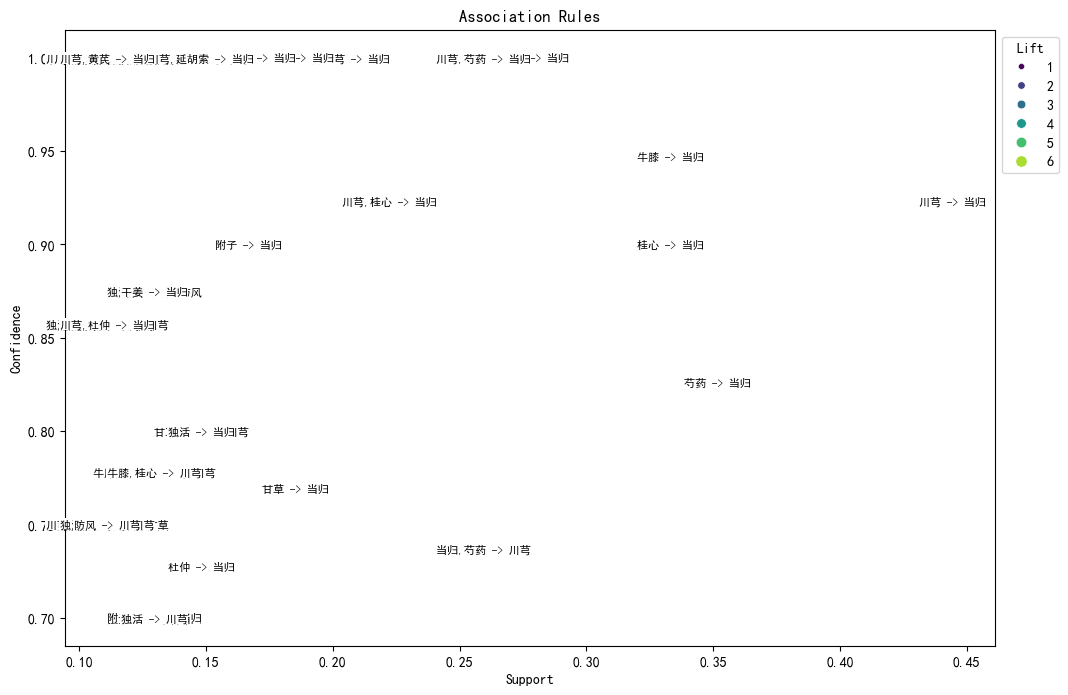

In [29]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1
df = df.astype(int)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 可视化关联规则
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="viridis")
plt.title("Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", loc="upper left", bbox_to_anchor=(1, 1))

# 在数据点上增加前项和后项，并调整注释位置以避免重叠
for i, row in rules.iterrows():
    plt.text(row['support'], row['confidence'], f"{','.join(row['antecedents'])} -> {','.join(row['consequents'])}", 
             fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.show()

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (独活, 当归, 川芎)            0.148148            0.111111   
112      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
109      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
106  (独活, 当归, 川芎)          (防风)            0.111111            0.148148   
111      (当归, 防风)      (独活, 川芎)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  r

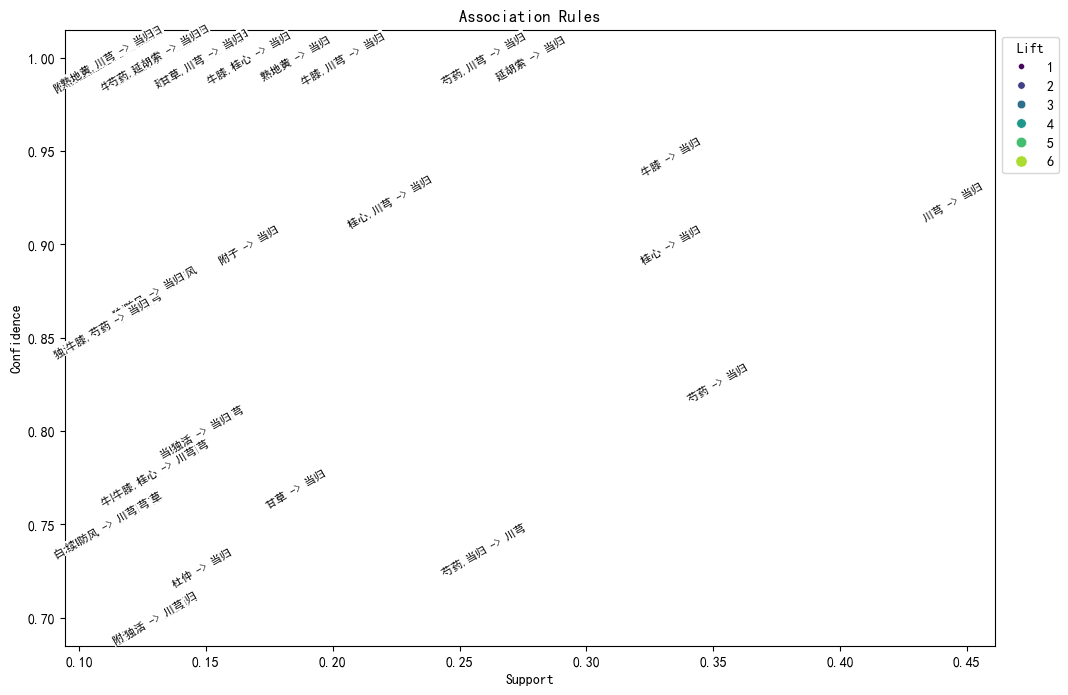

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1，并转换为布尔类型
df = df.astype(bool)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 可视化关联规则
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="viridis")
plt.title("Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", loc="upper left", bbox_to_anchor=(1, 1))

# 在数据点上增加前项和后项，并调整注释位置以避免重叠
for i, row in rules.iterrows():
    plt.text(row['support'], row['confidence'], f"{','.join(row['antecedents'])} -> {','.join(row['consequents'])}", 
             fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=0.5), rotation=30)

plt.show()

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (川芎, 独活, 当归)            0.148148            0.111111   
111      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
109      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
105  (川芎, 独活, 当归)          (防风)            0.111111            0.148148   
112      (防风, 当归)      (川芎, 独活)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

C:\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


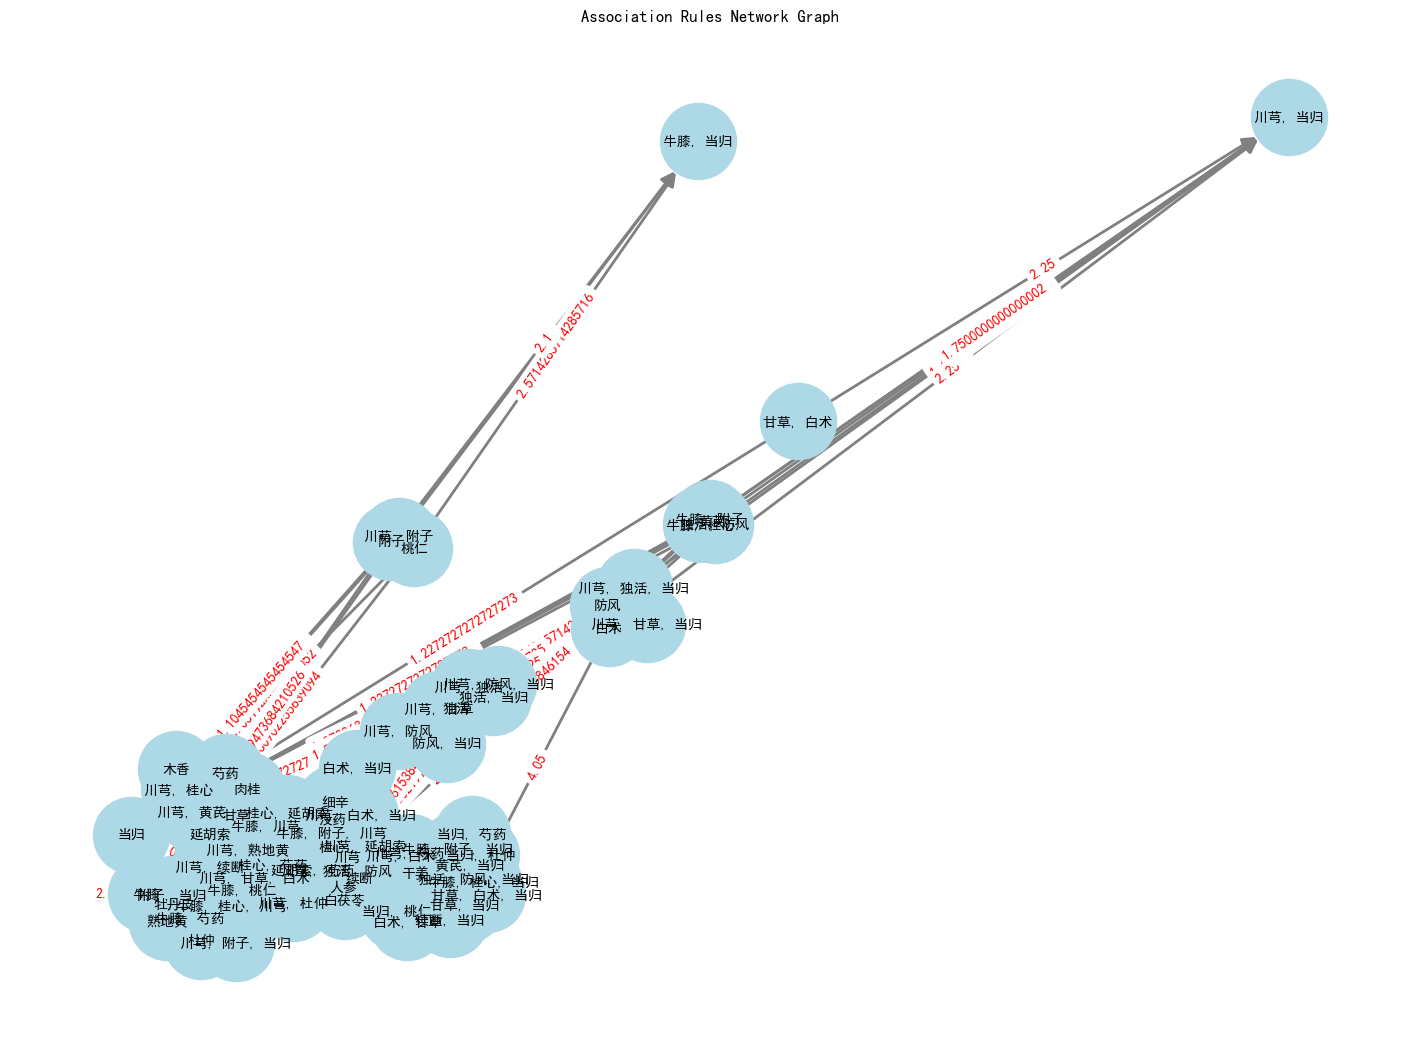

In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1，并转换为布尔类型
df = df.astype(bool)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 创建网络图
G = nx.DiGraph()

# 添加节点和边
for i, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

# 绘制网络图
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, arrowsize=20)

# 添加边的权重标签
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Association Rules Network Graph")
plt.show()

In [ ]:
#### 生成所有提升度>1的交互网络图

In [39]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from pyvis.network import Network

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1，并转换为布尔类型
df = df.astype(bool)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 筛选提升度大于1的规则
rules_with_lift_gt_1 = rules[rules['lift'] > 1]

# 打印筛选后的关联规则
print(rules_with_lift_gt_1)

# 创建网络图
G = nx.DiGraph()

# 添加节点和边
for i, row in rules_with_lift_gt_1.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

# 创建可交互的网络图
net = Network(notebook=True, height="750px", width="100%")
net.from_nx(G)

# 显示网络图
net.show("arn1.html")

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (川芎, 独活, 当归)            0.148148            0.111111   
111      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
109      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
105  (川芎, 独活, 当归)          (防风)            0.111111            0.148148   
112      (防风, 当归)      (川芎, 独活)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

C:\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


#### 仅生成前项为2的规则图

In [38]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from pyvis.network import Network

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1，并转换为布尔类型
df = df.astype(bool)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 筛选前项为2的规则
rules_with_antecedent_2 = rules[rules['antecedents'].apply(lambda x: len(x) == 2)]

# 打印筛选后的关联规则
print(rules_with_antecedent_2)

# 创建网络图
G = nx.DiGraph()

# 添加节点和边
for i, row in rules_with_antecedent_2.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

# 创建可交互的网络图
net = Network(notebook=True, height="750px", width="100%")
net.from_nx(G)

# 显示网络图
net.show("arn2.html")

      antecedents   consequents  antecedent support  consequent support  \
113          (防风)  (川芎, 独活, 当归)            0.148148            0.111111   
111      (独活, 当归)      (川芎, 防风)            0.148148            0.111111   
109      (川芎, 防风)      (独活, 当归)            0.111111            0.148148   
105  (川芎, 独活, 当归)          (防风)            0.111111            0.148148   
112      (防风, 当归)      (川芎, 独活)            0.129630            0.129630   
..            ...           ...                 ...                 ...   
17           (芍药)          (当归)            0.425926            0.814815   
14           (续断)          (当归)            0.185185            0.814815   
26           (独活)          (当归)            0.185185            0.814815   
22           (甘草)          (当归)            0.240741            0.814815   
11           (杜仲)          (当归)            0.203704            0.814815   

      support  confidence      lift  leverage  conviction  zhangs_metric  
113  0.111111    0.75000

C:\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
#### 仅生成前项为1的交互网络图

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from pyvis.network import Network

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件，指定编码格式为 'gbk'
df = pd.read_csv('hebr.csv', encoding='gbk')

# 检查并处理缺失值
df = df.fillna(0)  # 将缺失值填充为0

# 确保数据框中的所有值都是0或1，并转换为布尔类型
df = df.astype(bool)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 按 lift 从大到小排序
rules = rules.sort_values(by='lift', ascending=False)

# 打印关联规则
print(rules)

# 筛选前项为1的规则
rules_with_antecedent_1 = rules[rules['antecedents'].apply(lambda x: len(x) == 1)]

# 打印筛选后的关联规则
print(rules_with_antecedent_1)

# 创建网络图
G = nx.DiGraph()

# 添加节点和边
for i, row in rules_with_antecedent_1.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

# 创建可交互的网络图
net = Network(notebook=True, height="750px", width="100%")
net.from_nx(G)

# 显示网络图
net.show("arn3.html")

NameError: name 'plt' is not defined

In [2]:
import streamlit as st
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Streamlit应用
def main():
    st.title("关联规则挖掘与可视化")

    # 上传CSV文件
    uploaded_file = st.file_uploader("上传CSV文件", type=["csv"])
    if uploaded_file is not None:
        # 读取CSV文件，指定编码格式为 'gbk'
        df = pd.read_csv(uploaded_file, encoding='gbk')

        # 检查并处理缺失值
        df = df.fillna(0)  # 将缺失值填充为0

        # 确保数据框中的所有值都是0或1，并转换为布尔类型
        df = df.astype(bool)

        # 使用Apriori算法生成频繁项集
        frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

        # 生成关联规则
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

        # 按 lift 从大到小排序
        rules = rules.sort_values(by='lift', ascending=False)

        # 显示关联规则
        st.write("关联规则:")
        st.write(rules)

        # 筛选前项为1的规则
        rules_with_antecedent_1 = rules[rules['antecedents'].apply(lambda x: len(x) == 1)]

        # 显示筛选后的关联规则
        st.write("筛选后的关联规则 (前项为1):")
        st.write(rules_with_antecedent_1)

        # 创建网络图
        G = nx.DiGraph()

        # 添加节点和边
        for i, row in rules_with_antecedent_1.iterrows():
            antecedents = ', '.join(row['antecedents'])
            consequents = ', '.join(row['consequents'])
            G.add_edge(antecedents, consequents, weight=row['lift'])

        # 创建可交互的网络图
        net = Network(notebook=True, height="750px", width="100%")
        net.from_nx(G)

        # 显示网络图
        net.save_graph("arn3.html")
        with open("arn3.html", "r", encoding="utf-8") as f:
            html_content = f.read()
        st.components.v1.html(html_content, height=750)

if __name__ == "__main__":
    main()

2024-11-28 19:28:18.851 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 19:28:18.967 
  command:

    streamlit run C:\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-28 19:28:18.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 19:28:18.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 19:28:18.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 19:28:18.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 19:28:18.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### 带滑动按钮选择前项和提升度

In [ ]:
import streamlit as st
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

# 设置 matplotlib 字体以支持中文字符
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Streamlit应用
def main():
    st.title("关联规则挖掘与可视化")

    # 上传CSV文件
    uploaded_file = st.file_uploader("上传CSV文件", type=["csv"])
    if uploaded_file is not None:
        # 读取CSV文件，指定编码格式为 'gbk'
        df = pd.read_csv(uploaded_file, encoding='gbk')

        # 检查并处理缺失值
        df = df.fillna(0)  # 将缺失值填充为0

        # 确保数据框中的所有值都是0或1，并转换为布尔类型
        df = df.astype(bool)

        # 使用Apriori算法生成频繁项集
        frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

        # 生成关联规则
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

        # 按 lift 从大到小排序
        rules = rules.sort_values(by='lift', ascending=False)

        # 显示关联规则
        st.write("关联规则:")
        st.write(rules)

        # 用户选择前项数和提升度
        min_antecedents = st.slider("选择前项数的最小值", min_value=1, max_value=5, value=1)
        min_lift = st.slider("选择提升度的最小值", min_value=0.0, max_value=2.0, value=1.0, step=0.1)

        # 筛选前项数和提升度
        rules_filtered = rules[
            (rules['antecedents'].apply(lambda x: len(x) >= min_antecedents)) &
            (rules['lift'] >= min_lift)
        ]

        # 显示筛选后的关联规则
        st.write("筛选后的关联规则:")
        st.write(rules_filtered)

        # 创建网络图
        G = nx.DiGraph()

        # 添加节点和边
        for i, row in rules_filtered.iterrows():
            antecedents = ', '.join(row['antecedents'])
            consequents = ', '.join(row['consequents'])
            G.add_edge(antecedents, consequents, weight=row['lift'])

        # 创建可交互的网络图
        net = Network(notebook=True, height="750px", width="100%")
        net.from_nx(G)

        # 显示网络图
        net.save_graph("arn3.html")
        with open("arn3.html", "r", encoding="utf-8") as f:
            html_content = f.read()
        st.components.v1.html(html_content, height=750)

if __name__ == "__main__":
    main()